# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Predictive-Analytics-for-Finance" data-toc-modified-id="Predictive-Analytics-for-Finance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Analytics for Finance</a></div><div class="lev2 toc-item"><a href="#Structured-Data" data-toc-modified-id="Structured-Data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Structured Data</a></div><div class="lev3 toc-item"><a href="#LSTM" data-toc-modified-id="LSTM-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>LSTM</a></div><div class="lev4 toc-item"><a href="#Check-the-input-(Re-Scaled)" data-toc-modified-id="Check-the-input-(Re-Scaled)-1111"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Check the input (Re-Scaled)</a></div><div class="lev4 toc-item"><a href="#Original-Network" data-toc-modified-id="Original-Network-1112"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Original Network</a></div><div class="lev4 toc-item"><a href="#Plot-:-Value-Comparison-prediction-with-the-real-one" data-toc-modified-id="Plot-:-Value-Comparison-prediction-with-the-real-one-1113"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>Plot : Value Comparison <code>prediction</code> with <code>the real one</code></a></div><div class="lev4 toc-item"><a href="#Plot-:-Considering-Time-foresight" data-toc-modified-id="Plot-:-Considering-Time-foresight-1114"><span class="toc-item-num">1.1.1.4&nbsp;&nbsp;</span>Plot : Considering Time <code>foresight</code></a></div><div class="lev4 toc-item"><a href="#Plot-:-Test-Only,-Considering-Time-foresight" data-toc-modified-id="Plot-:-Test-Only,-Considering-Time-foresight-1115"><span class="toc-item-num">1.1.1.5&nbsp;&nbsp;</span>Plot : Test Only, Considering Time <code>foresight</code></a></div><div class="lev4 toc-item"><a href="#Plot-:-Test-Only,-Considering-Time-foresight,-Subsetted" data-toc-modified-id="Plot-:-Test-Only,-Considering-Time-foresight,-Subsetted-1116"><span class="toc-item-num">1.1.1.6&nbsp;&nbsp;</span>Plot : Test Only, Considering Time <code>foresight</code>, Subsetted</a></div><div class="lev4 toc-item"><a href="#Prediction" data-toc-modified-id="Prediction-1117"><span class="toc-item-num">1.1.1.7&nbsp;&nbsp;</span>Prediction</a></div>

# Predictive Analytics for Finance

In [1]:
import os
import math
import datetime as dt
import itertools as it
from glob import glob
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, RepeatVector

import matplotlib.pyplot as plt
%matplotlib inline

/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Structured Data

In [2]:
kospi_data = pd.read_csv('kospi/kospi200_20100101_20171130.csv', index_col=['Date'])
kospi_data.index = pd.to_datetime(kospi_data.index)
kospi_data

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,221.67,223.49,221.66,223.49,85967000
2010-01-05,224.24,224.40,222.18,222.84,153282000
2010-01-06,223.83,224.96,223.52,224.67,170500000
2010-01-07,224.23,224.77,221.31,221.31,183416000
2010-01-08,222.65,222.81,219.15,222.66,157255000
2010-01-11,223.31,224.18,222.23,222.23,155386000
2010-01-12,222.50,223.39,220.86,223.04,121230000
2010-01-13,220.82,221.46,219.01,219.17,116028000
2010-01-14,220.39,222.24,219.88,221.19,134055000


### LSTM

In [3]:
look_back = 10
foresight = 7

In [4]:
def preprocessor(filename, x_col=None, y_col=None, test_ratio=.5, xlen=1, ylen=1, foresight=1):
    
    ndimX = len(x_col)
    ndimY = len(y_col)
    
    # Load the Data:
    # If 'filename' is string type, the 'CSV' file will be loaded.
    # If 'filename' is a variable name, the 'DataFrame' will be loaded.
    if isinstance(filename, str):
        pandf = pd.read_csv(filename, index_col="Date")
    else:
        pandf = filename
 
    # Convert the Data: 'numpy.ndarray'
    """
    pandf               : pandas.DataFrame
    pandf[x_col]        : pandas.Series (a column)
    pandf[y_col].values : numpy.ndarray (Series -> ndarray)
    reshape             : change the dimension of ndarray
                          '-1' means the remaining.
                          ======================================
                          >>> tmp = np.arange(12)  # (12, )
                          array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

                          >>> tmp.reshape(-1, 2)  # (6, 2)
                          array([[ 0,  1],
                                 [ 2,  3],
                                 [ 4,  5],
                                 [ 6,  7],
                                 [ 8,  9],
                                 [10, 11]])

                          >>> tmp.reshape(-1, 4)  # (3, 4)
                          array([[ 0,  1,  2,  3],
                                 [ 4,  5,  6,  7],
                                 [ 8,  9, 10, 11]])
                          ======================================

    """
    nparr_X = pandf[x_col].values.reshape(-1, ndimX).astype('float32')
    nparr_Y = pandf[y_col].values.reshape(-1, ndimY).astype('float32')

    # Scale the Data
    scalerX = MinMaxScaler(feature_range=(0, 1))
    scalerY = MinMaxScaler(feature_range=(0, 1))
    nptf_X = scalerX.fit_transform(nparr_X)
    nptf_Y = scalerY.fit_transform(nparr_Y)
 
    # Split the Data: Train & Test
    train_size = int(pandf.shape[0] * (1 - test_ratio))
    test_size = pandf.shape[0] - train_size
    
    # Reshape the Data: [samples, time steps, features]
    """
    >>> xlen, foresight = 3, 2
    >>> tmp
    array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
    
    >>> x = np.array([tmp[i:i+3] for i in range(len(tmp) - 3 - 2)])
    >>> x
    array([[0, 1, 2],
           [1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6],
           [5, 6, 7],
           [6, 7, 8]])
    
    """
    nptf_X_new = np.array([nptf_X[i:i+xlen]\
                           for i in range(len(nptf_X) - xlen - foresight - ylen)])
    trainX, testX = nptf_X_new[:train_size], nptf_X_new[train_size:]

    """
    >>> y = tmp[3 + 2:]
    >>> y
    array([ 5,  6,  7,  8,  9, 10, 11])
    
    """
    nptf_Y_new = nptf_Y[xlen + foresight:-ylen]
    trainY, testY = nptf_Y_new[:train_size], nptf_Y_new[train_size:]
    
    print('X :', len(trainX), len(testX))
    print('Y :', len(trainY), len(testY))
    
    return ndimX, scalerX, scalerY, trainX, trainY, testX, testY

In [5]:
ndimX, scalerX, scalerY, trainX, trainY, testX, testY = preprocessor(kospi_data, x_col=['Open', 'High', 'Low', 'Close'], y_col=['Close'], test_ratio=.5, xlen=look_back, foresight=foresight)

X : 978 961
Y : 978 961


In [6]:
trainX.shape

(978, 10, 4)

In [7]:
trainY.shape

(978, 1)

#### Check the input (Re-Scaled)

In [8]:
for _ in range(5):
    print(scalerX.inverse_transform(trainX[_]), scalerY.inverse_transform(trainY[_:_+1]))

[[221.67    223.49    221.66    223.49   ]
 [224.23999 224.4     222.18    222.84   ]
 [223.83    224.96    223.52    224.67   ]
 [224.23    224.77    221.31    221.31   ]
 [222.65    222.81    219.15    222.66   ]
 [223.31    224.18    222.23    222.23   ]
 [222.5     223.39    220.86    223.04   ]
 [220.82    221.46    219.01    219.17   ]
 [220.39001 222.24    219.88    221.19   ]
 [222.33    223.69    221.12    223.21   ]] [[213.02]]
[[224.23999 224.4     222.18    222.84   ]
 [223.83    224.96    223.52    224.67   ]
 [224.23    224.77    221.31    221.31   ]
 [222.65    222.81    219.15    222.66   ]
 [223.31    224.18    222.23    222.23   ]
 [222.5     223.39    220.86    223.04   ]
 [220.82    221.46    219.01    219.17   ]
 [220.39001 222.24    219.88    221.19   ]
 [222.33    223.69    221.12    223.21   ]
 [222.26    225.19    221.21    224.38   ]] [[215.67]]
[[223.83    224.96    223.52    224.67   ]
 [224.23    224.77    221.31    221.31   ]
 [222.65    222.81    219.15  

##### Train

In [9]:
kospi_data['Close'][look_back + foresight:][:len(trainY)]

Date
2010-01-27    213.02
2010-01-28    215.67
2010-01-29    210.34
2010-02-01    210.76
2010-02-02    209.27
2010-02-03    211.86
2010-02-04    211.72
2010-02-05    205.06
2010-02-08    203.37
2010-02-09    206.01
2010-02-10    205.94
2010-02-11    209.73
2010-02-12    208.74
2010-02-16    209.73
2010-02-17    213.44
2010-02-18    212.55
2010-02-19    208.70
2010-02-22    213.28
2010-02-23    213.45
2010-02-24    210.92
2010-02-25    207.56
2010-02-26    208.36
2010-03-02    211.44
2010-03-03    212.36
2010-03-04    211.91
2010-03-05    214.05
2010-03-08    217.73
2010-03-09    217.82
2010-03-10    217.82
2010-03-11    216.76
               ...  
2013-11-19    267.81
2013-11-20    265.62
2013-11-21    262.20
2013-11-22    263.86
2013-11-25    265.21
2013-11-26    266.26
2013-11-27    267.15
2013-11-28    269.70
2013-11-29    269.57
2013-12-02    267.58
2013-12-03    264.84
2013-12-04    261.48
2013-12-05    261.10
2013-12-06    260.71
2013-12-09    263.70
2013-12-10    262.68
2013-12-

In [10]:
pd.Series([scalerY.inverse_transform(trainY[_:_+1]).flatten()[0] for _ in range(len(trainY))])

0      213.020004
1      215.669998
2      210.339996
3      210.759995
4      209.270004
5      211.860001
6      211.720001
7      205.059998
8      203.369995
9      206.009995
10     205.940002
11     209.729996
12     208.740005
13     209.729996
14     213.440002
15     212.550003
16     208.699997
17     213.279999
18     213.449997
19     210.919998
20     207.559998
21     208.360001
22     211.440018
23     212.360001
24     211.910004
25     214.050003
26     217.729996
27     217.820007
28     217.820007
29     216.759995
          ...    
948    267.809998
949    265.619995
950    262.200012
951    263.859985
952    265.209991
953    266.260010
954    267.149994
955    269.700012
956    269.570007
957    267.579987
958    264.839996
959    261.480011
960    261.100006
961    260.709991
962    263.700012
963    262.679993
964    260.549988
965    259.049988
966    258.040009
967    257.899994
968    258.720001
969    259.980011
970    260.200012
971    261.269989
972    263

##### Test

In [11]:
kospi_data['Close'][look_back + foresight:][len(trainY):]

Date
2014-01-03    254.48
2014-01-06    255.41
2014-01-07    255.98
2014-01-08    255.76
2014-01-09    253.63
2014-01-10    252.48
2014-01-13    254.08
2014-01-14    253.97
2014-01-15    254.73
2014-01-16    255.36
2014-01-17    253.46
2014-01-20    254.81
2014-01-21    256.34
2014-01-22    257.08
2014-01-23    253.74
2014-01-24    252.89
2014-01-27    248.95
2014-01-28    249.91
2014-01-29    252.89
2014-02-03    250.01
2014-02-04    245.30
2014-02-05    246.04
2014-02-06    248.56
2014-02-07    250.51
2014-02-10    250.47
2014-02-11    251.87
2014-02-12    252.31
2014-02-13    250.97
2014-02-14    252.74
2014-02-17    253.64
               ...  
2017-10-20    328.89
2017-10-23    329.45
2017-10-24    328.96
2017-10-25    329.31
2017-10-26    326.99
2017-10-27    329.23
2017-10-30    330.38
2017-10-31    333.57
2017-11-01    338.76
2017-11-02    337.53
2017-11-03    338.83
2017-11-06    337.40
2017-11-07    336.76
2017-11-08    337.80
2017-11-09    337.14
2017-11-10    335.96
2017-11-

In [12]:
pd.Series([scalerY.inverse_transform(testY[_:_+1]).flatten()[0] for _ in range(len(testY))])

0      254.479996
1      255.410004
2      255.979996
3      255.759995
4      253.630005
5      252.479996
6      254.080002
7      253.970001
8      254.729996
9      255.360001
10     253.460007
11     254.809998
12     256.339996
13     257.079987
14     253.740005
15     252.890015
16     248.949997
17     249.910004
18     252.890015
19     250.009995
20     245.300003
21     246.039993
22     248.559998
23     250.509995
24     250.470001
25     251.869995
26     252.309998
27     250.970001
28     252.740005
29     253.639999
          ...    
931    326.470001
932    328.890015
933    329.450012
934    328.959991
935    329.309998
936    326.989990
937    329.230011
938    330.380005
939    333.570007
940    338.760010
941    337.529999
942    338.829987
943    337.399994
944    336.760010
945    337.799988
946    337.140015
947    335.959991
948    334.329987
949    333.619995
950    332.170013
951    334.359985
952    334.179993
953    332.920013
954    333.510010
955    335

#### Original Network

In [13]:
_, timestepX, ndimX = trainX.shape
#_, timestepY, ndimY = trainY.shape
timestepY, ndimY = trainY.shape

units = 8

# simple lstm network learning
model = Sequential()
"""
2D: (batch_size, units)
3D: (batch_size, timesteps, input_dim)
"""
model.add(LSTM(units,  # Network Node
               input_shape=(timestepX, ndimX),  # Time-step, Feature Number
               #dropout=.3,  # Drop-Out Ratio; Among the Input
               recurrent_dropout=.3,  # Recurrent Drop-out Ratio; Among the Recurrent Network
               return_sequences=False  # If LSTM Returns the sequence;the same dimension of the input.
              ))
model.add(Dense(ndimY,  # Network Node
                input_shape=(timestepY, ndimY),  # Time-step, Feature Number
                activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
fitted = model.fit(trainX, trainY,
                   epochs=100,     # How many times to run back_propagation
                   batch_size=128,  # How many data to deal with at one epoch
                   verbose=2,       # 1: progress bar, 2: one line per epoch
                   validation_data=(testX, testY),  # Validation set
                   shuffle=False)

Train on 978 samples, validate on 961 samples
Epoch 1/100
 - 1s - loss: 0.0382 - mean_absolute_error: 0.1780 - val_loss: 0.0359 - val_mean_absolute_error: 0.1655
Epoch 2/100
 - 0s - loss: 0.0134 - mean_absolute_error: 0.0979 - val_loss: 0.0103 - val_mean_absolute_error: 0.0747
Epoch 3/100
 - 0s - loss: 0.0046 - mean_absolute_error: 0.0519 - val_loss: 0.0045 - val_mean_absolute_error: 0.0499
Epoch 4/100
 - 0s - loss: 0.0055 - mean_absolute_error: 0.0557 - val_loss: 0.0047 - val_mean_absolute_error: 0.0554
Epoch 5/100
 - 0s - loss: 0.0052 - mean_absolute_error: 0.0529 - val_loss: 0.0046 - val_mean_absolute_error: 0.0489
Epoch 6/100
 - 0s - loss: 0.0043 - mean_absolute_error: 0.0490 - val_loss: 0.0056 - val_mean_absolute_error: 0.0515
Epoch 7/100
 - 0s - loss: 0.0043 - mean_absolute_error: 0.0500 - val_loss: 0.0059 - val_mean_absolute_error: 0.0531
Epoch 8/100
 - 0s - loss: 0.0042 - mean_absolute_error: 0.0496 - val_loss: 0.0053 - val_mean_absolute_error: 0.0503
Epoch 9/100
 - 0s - loss: 

Epoch 71/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0463 - val_loss: 0.0035 - val_mean_absolute_error: 0.0433
Epoch 72/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0462 - val_loss: 0.0035 - val_mean_absolute_error: 0.0432
Epoch 73/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0462 - val_loss: 0.0035 - val_mean_absolute_error: 0.0432
Epoch 74/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0462 - val_loss: 0.0035 - val_mean_absolute_error: 0.0432
Epoch 75/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0462 - val_loss: 0.0035 - val_mean_absolute_error: 0.0432
Epoch 76/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0462 - val_loss: 0.0035 - val_mean_absolute_error: 0.0432
Epoch 77/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0461 - val_loss: 0.0035 - val_mean_absolute_error: 0.0431
Epoch 78/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0461 - val_loss: 0.0035 - val_mean_absolute_error: 0.0431
Epoch 79/100
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0461 

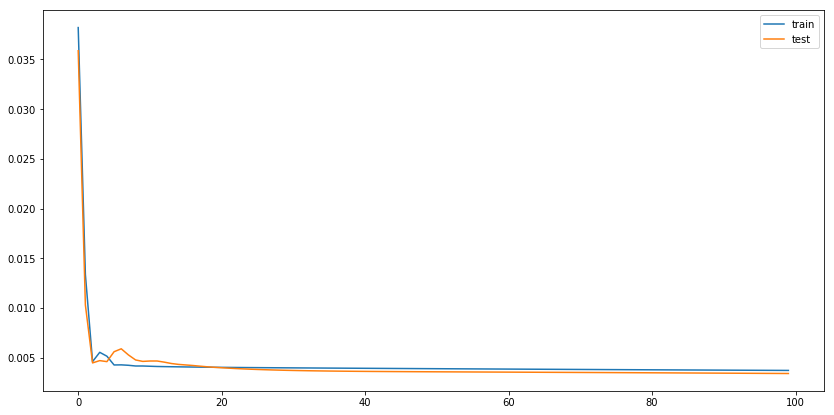

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
ax.plot(fitted.history['loss'], label='train')
if fitted.history['val_loss']:
    ax.plot(fitted.history['val_loss'], label='test')
ax.legend()

In [15]:
train_y_hat = scalerY.inverse_transform(model.predict(trainX))
train_y = scalerY.inverse_transform(trainY)
train_score = math.sqrt(mean_squared_error(train_y, train_y_hat))
print('Training Score: %.2f RMSE' % train_score)

Training Score: 8.25 RMSE


In [16]:
# make prediction
test_y_hat = scalerY.inverse_transform(model.predict(testX))
test_y = scalerY.inverse_transform(testY)
test_score = math.sqrt(mean_squared_error(test_y, test_y_hat))
print('Test Score: %.2f RMSE' % test_score)

Test Score: 7.92 RMSE


In [17]:
y_hat = np.append(train_y_hat, test_y_hat)
y = np.append(train_y, test_y)

In [18]:
# predict last value (or tomorrow?)
lastX = testX[-1]
lastY = testY[:-1]

print('Input: ')
print(scalerX.inverse_transform(testX[-1]))
realX = lastX.reshape((1, look_back, ndimX))

predY = scalerY.inverse_transform(model.predict(realX))
realY = scalerY.inverse_transform(lastY)
print('\nPredict the Close value of the final day')
print('Predict:', predY.reshape(1)[0])  # 데이터 입력 마지막 다음날 종가 예측
print('Real   :', realY[-1].reshape(1)[0])

Input: 
[[338.66    339.00998 334.53    337.4    ]
 [337.23    338.35    336.      336.76   ]
 [335.2     338.9     335.02    337.8    ]
 [338.55002 338.59    334.99    337.14   ]
 [335.64    336.69    334.63    335.96   ]
 [336.63    337.34    333.73    334.33   ]
 [334.63    334.73    333.13    333.62   ]
 [333.38998 333.6     331.36    332.17   ]
 [332.75    334.92    331.84    334.36   ]
 [336.05    338.04    334.18    334.18   ]]

Predict the Close value of the final day
Predict: 315.84726
Real   : 330.99


#### Plot : Value Comparison `prediction` with `the real one`

1939 1940


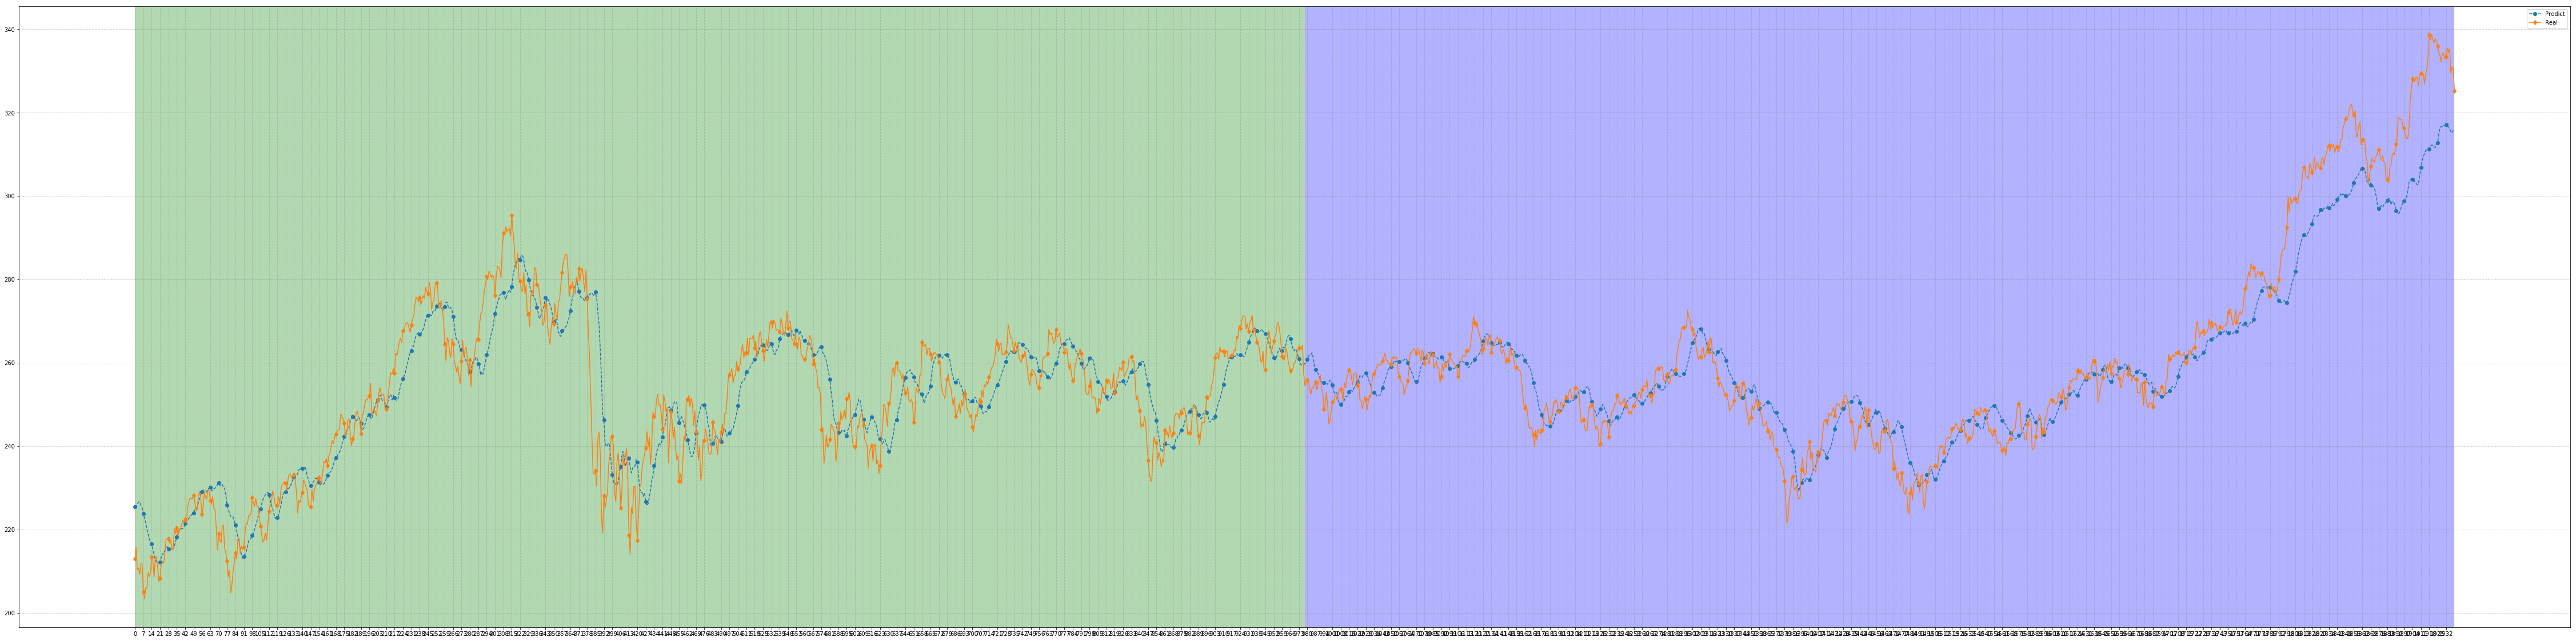

In [19]:
y_compare = kospi_data['Close'][look_back + foresight:].values.reshape((-1, 1))
print(len(y_hat), len(y_compare))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80, 20))
ax.plot(y_hat, label='Predict', linestyle='--', marker='o', markevery=list(range(0, len(y_hat), 7)))
ax.plot(y_compare, label='Real', marker='d', markevery=list(range(0, len(y_compare), 7)))
ax.legend()
ax.axvspan(0, len(train_y), facecolor='green', alpha=0.3)
ax.axvspan(len(train_y), len(y), facecolor='blue', alpha=0.3)
ax.set_xticks(list(range(0, len(y_hat), 7)))
ax.grid(color='grey', linestyle='--', linewidth=1, alpha=.3)

#### Plot : Considering Time `foresight`

1939 1940


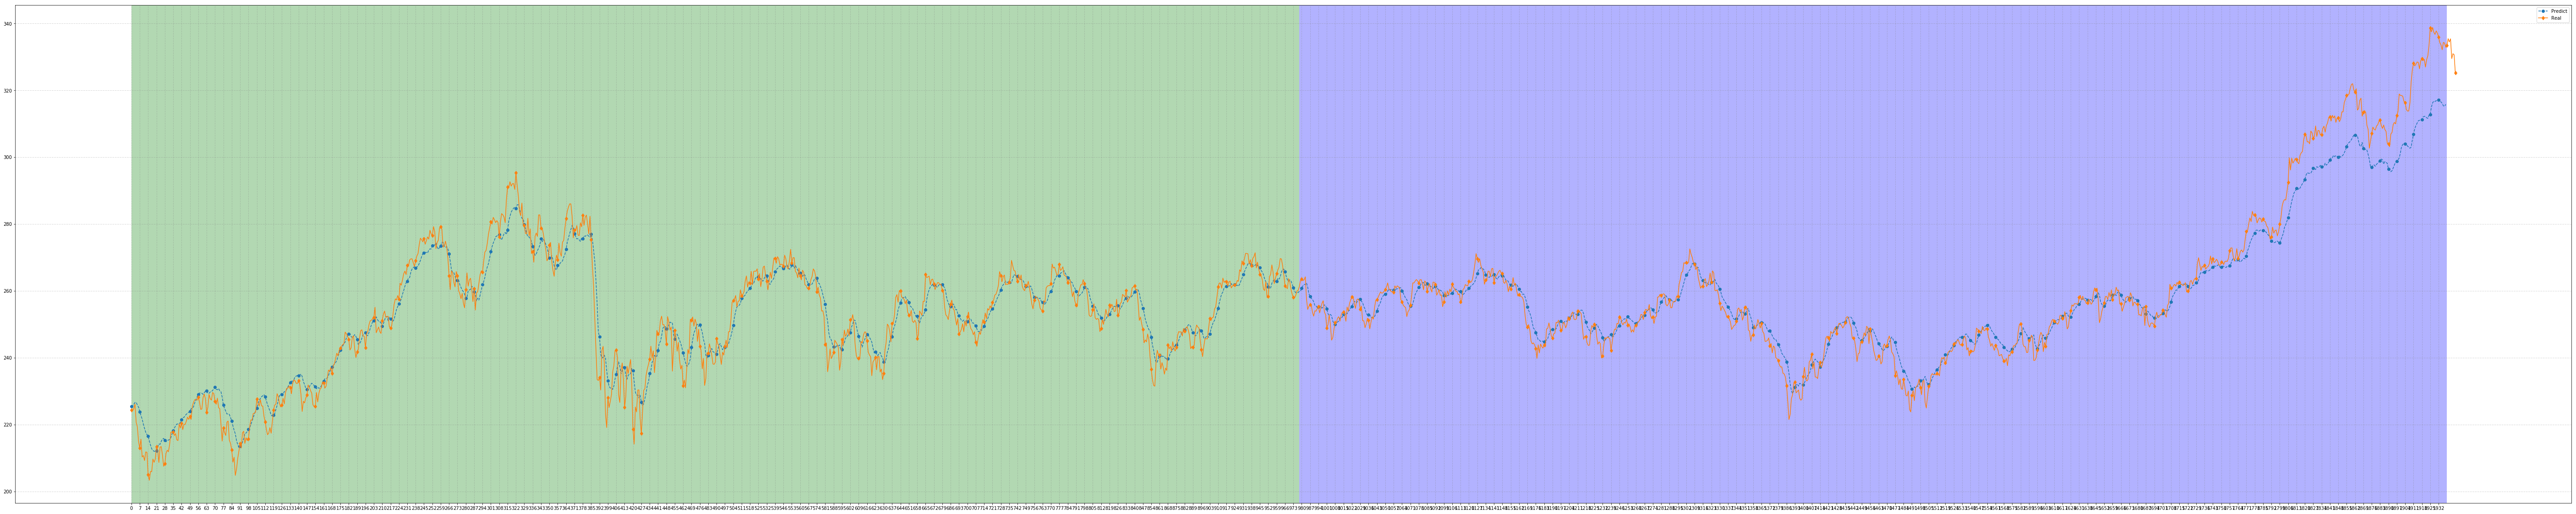

In [20]:
y_ontime = kospi_data['Close'][look_back:].values.reshape((-1, 1))
print(len(y_hat), len(y_compare))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(100, 20))
ax.plot(y_hat, label='Predict', linestyle='--', marker='o', markevery=list(range(0, len(y_hat), 7)))
ax.plot(y_ontime, label='Real', marker='d', markevery=list(range(0, len(y_ontime), 7)))
ax.legend()
ax.axvspan(0, len(train_y), facecolor='green', alpha=0.3)
ax.axvspan(len(train_y), len(y), facecolor='blue', alpha=0.3)
ax.set_xticks(list(range(0, len(y_hat), 7)))
ax.grid(color='grey', linestyle='--', linewidth=1, alpha=.3)
#ax.grid(color='grey', linestyle='--', linewidth=.5, alpha=.2)

#### Plot : Test Only, Considering Time `foresight`

Pred: 961, Y: 968, Real: 969


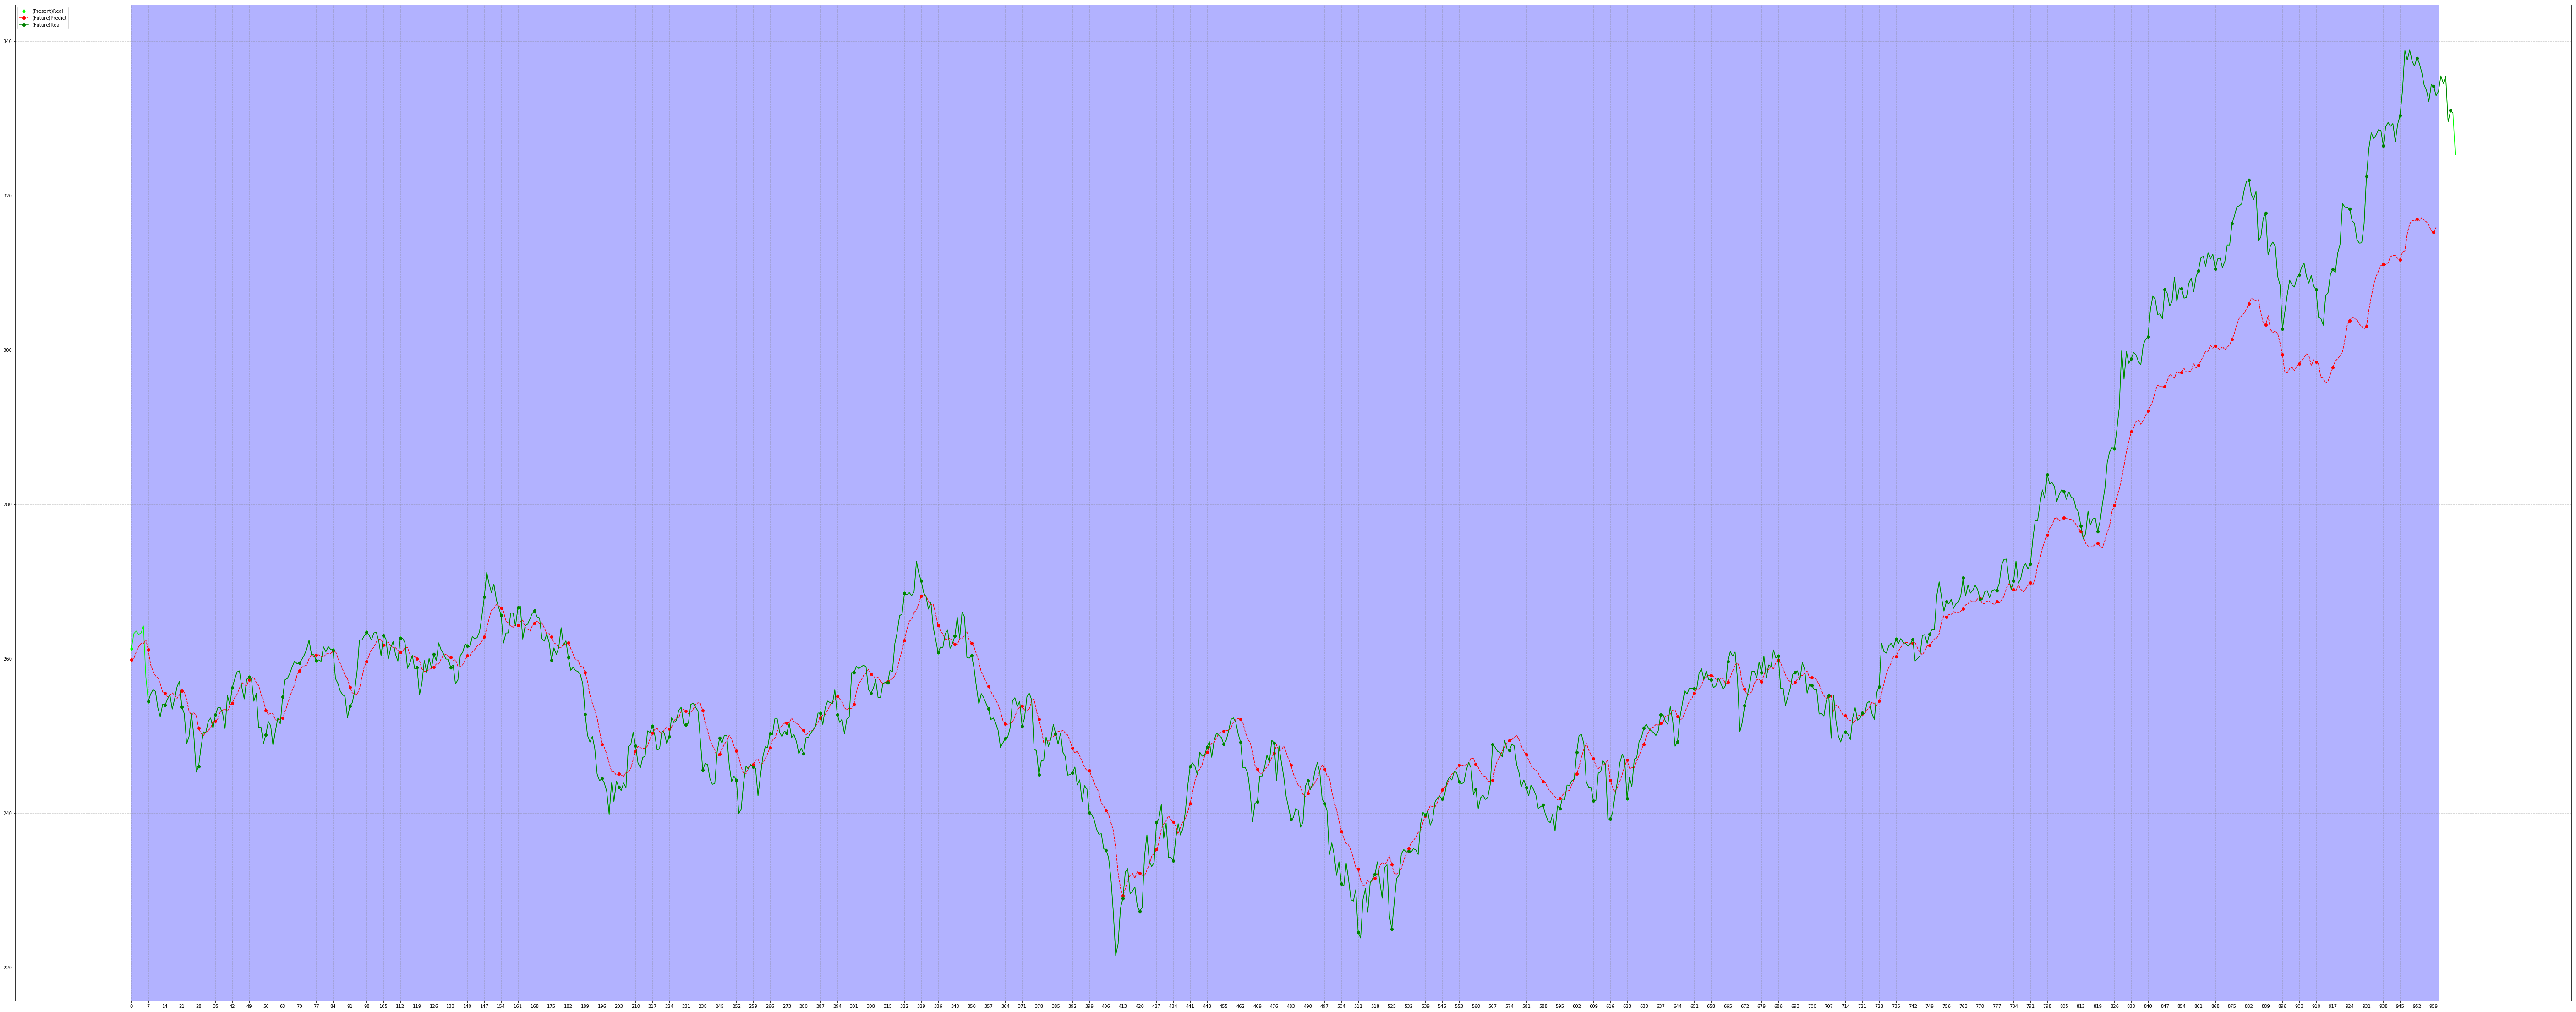

In [21]:
test_y_ontime = kospi_data['Close'][look_back:][len(trainY):].values.reshape((-1, 1))

buffer = np.empty((foresight, 1)) * np.nan
#buffered_test_y_hat = np.concatenate([buffer, test_y_hat])
buffered_test_y_hat = test_y_hat
buffered_test_y = np.concatenate([buffer, test_y])

print('Pred: %s, Y: %s, Real: %s' % (len(buffered_test_y_hat), len(buffered_test_y), len(test_y_ontime)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(100, 40))
ax.plot(test_y_ontime, label='(Present)Real', color='lime', marker='d', markevery=list(range(0, len(test_y_ontime), 7)))
ax.plot(buffered_test_y_hat, label='(Future)Predict', color='r', linestyle='--', marker='o', markevery=list(range(0, len(buffered_test_y_hat), 7)))
ax.plot(buffered_test_y, label='(Future)Real', color='g', marker='o', markevery=list(range(0, len(buffered_test_y), 7)))
ax.legend(loc='upper left')
ax.axvspan(0, len(buffered_test_y_hat), facecolor='blue', alpha=0.3)
ax.set_xticks(list(range(0, len(buffered_test_y_hat), 7)))
ax.grid(color='grey', linestyle='--', linewidth=1, alpha=.3)

In [22]:
kospi_data['Close'][len(train_y) + look_back + foresight:]

Date
2014-01-03    254.48
2014-01-06    255.41
2014-01-07    255.98
2014-01-08    255.76
2014-01-09    253.63
2014-01-10    252.48
2014-01-13    254.08
2014-01-14    253.97
2014-01-15    254.73
2014-01-16    255.36
2014-01-17    253.46
2014-01-20    254.81
2014-01-21    256.34
2014-01-22    257.08
2014-01-23    253.74
2014-01-24    252.89
2014-01-27    248.95
2014-01-28    249.91
2014-01-29    252.89
2014-02-03    250.01
2014-02-04    245.30
2014-02-05    246.04
2014-02-06    248.56
2014-02-07    250.51
2014-02-10    250.47
2014-02-11    251.87
2014-02-12    252.31
2014-02-13    250.97
2014-02-14    252.74
2014-02-17    253.64
               ...  
2017-10-20    328.89
2017-10-23    329.45
2017-10-24    328.96
2017-10-25    329.31
2017-10-26    326.99
2017-10-27    329.23
2017-10-30    330.38
2017-10-31    333.57
2017-11-01    338.76
2017-11-02    337.53
2017-11-03    338.83
2017-11-06    337.40
2017-11-07    336.76
2017-11-08    337.80
2017-11-09    337.14
2017-11-10    335.96
2017-11-

In [23]:
test_y_ontime

array([[261.27],
       [263.24],
       [263.58],
       [263.15],
       [263.32],
       [264.24],
       [257.64],
       [254.48],
       [255.41],
       [255.98],
       [255.76],
       [253.63],
       [252.48],
       [254.08],
       [253.97],
       [254.73],
       [255.36],
       [253.46],
       [254.81],
       [256.34],
       [257.08],
       [253.74],
       [252.89],
       [248.95],
       [249.91],
       [252.89],
       [250.01],
       [245.3 ],
       [246.04],
       [248.56],
       [250.51],
       [250.47],
       [251.87],
       [252.31],
       [250.97],
       [252.74],
       [253.64],
       [253.66],
       [252.92],
       [250.95],
       [255.22],
       [254.01],
       [256.24],
       [257.31],
       [258.28],
       [258.41],
       [256.29],
       [254.78],
       [257.3 ],
       [257.63],
       [257.35],
       [254.48],
       [255.49],
       [251.11],
       [251.09],
       [249.02],
       [250.15],
       [251.87],
       [251.32

In [24]:
test_y_hat

array([[259.88086],
       [259.98947],
       [260.8907 ],
       [261.539  ],
       [261.9572 ],
       [261.94086],
       [262.4291 ],
       [261.15778],
       [259.2106 ],
       [258.37903],
       [257.7912 ],
       [257.5004 ],
       [256.77118],
       [255.6792 ],
       [255.522  ],
       [255.05042],
       [255.24542],
       [255.56766],
       [255.28578],
       [254.85313],
       [255.30873],
       [255.8482 ],
       [255.64171],
       [254.70126],
       [253.21555],
       [252.66792],
       [252.99423],
       [252.60364],
       [251.00424],
       [250.30618],
       [250.03983],
       [250.4697 ],
       [250.70073],
       [251.00464],
       [251.92703],
       [251.89003],
       [252.21419],
       [253.0966 ],
       [253.34628],
       [253.44263],
       [253.17172],
       [253.94057],
       [254.23941],
       [254.92313],
       [255.39595],
       [256.17365],
       [256.92834],
       [256.64172],
       [256.46423],
       [257.27032],


#### Plot : Test Only, Considering Time `foresight`, Subsetted

Pred: 961, Y: 961, Real: 969


(0, 500)

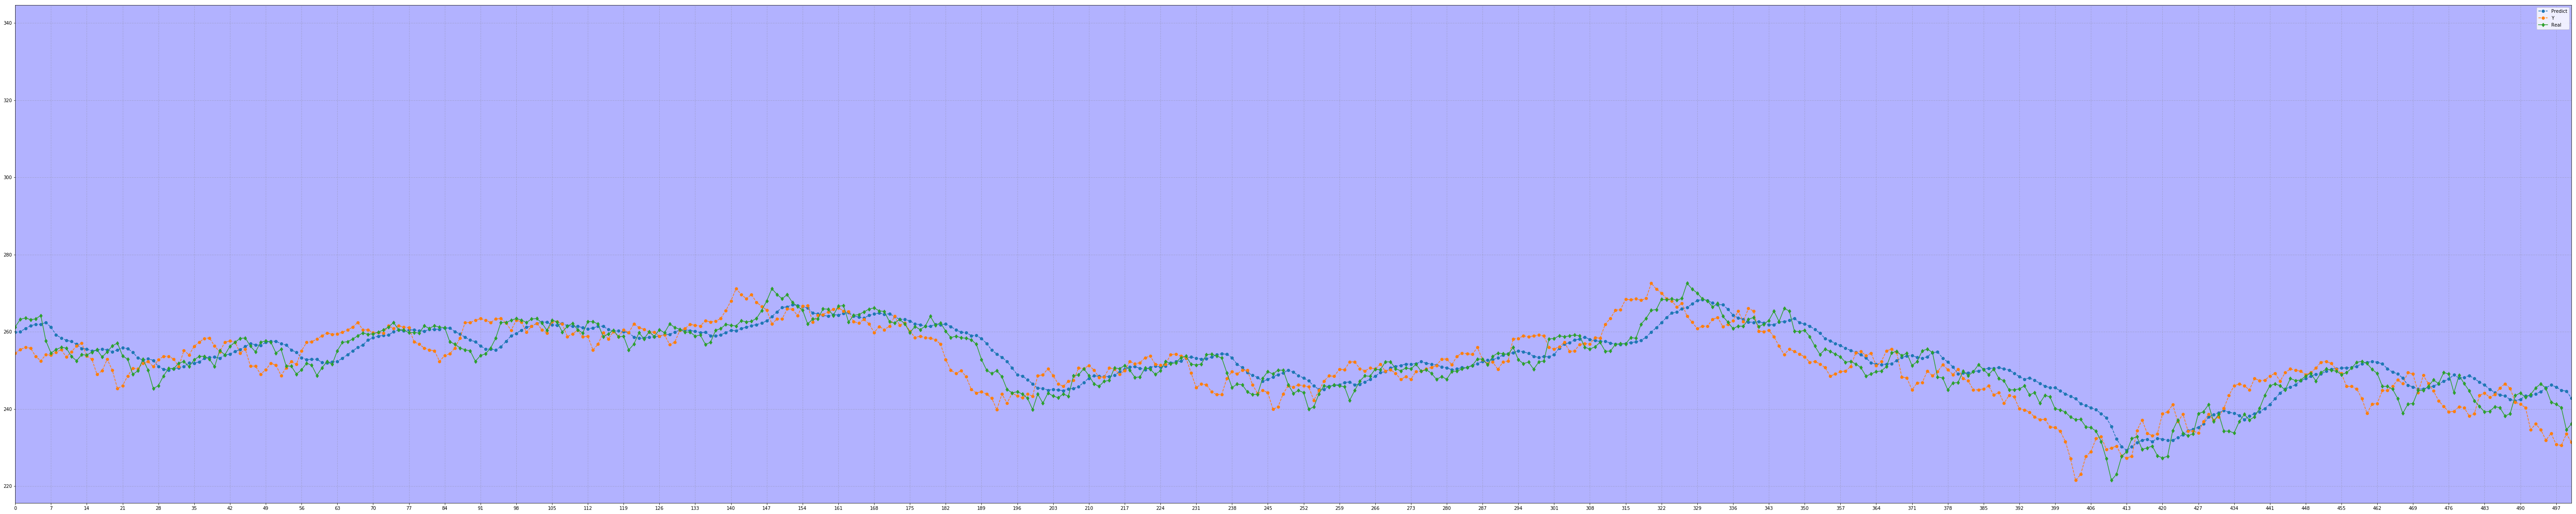

In [25]:
test_y_ontime = kospi_data['Close'][look_back:][len(trainY):].values.reshape((-1, 1))

print('Pred: %s, Y: %s, Real: %s' % (len(test_y_hat), len(test_y), len(test_y_ontime)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(100, 20))
ax.plot(test_y_hat, label='Predict', linestyle='--', marker='o', markevery=list(range(0, len(test_y_hat), 1)))
ax.plot(test_y, label='Y', linestyle='--', marker='o', markevery=list(range(0, len(test_y), 1)))
ax.plot(test_y_ontime, label='Real', marker='d', markevery=list(range(0, len(test_y_ontime), 1)))
ax.legend()
ax.axvspan(0, len(test_y_hat), facecolor='blue', alpha=0.3)
ax.set_xticks(list(range(0, len(y_hat), 7)))
ax.grid(color='grey', linestyle='--', linewidth=1, alpha=.3)
ax.set_xlim(0, 500)

#### Prediction

In [27]:
newdata = pd.read_csv('kospi/kospi200_20170101_20171130.csv', index_col=['Date'])
newdata.index = pd.to_datetime(newdata.index)
newdata

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,221.67,223.49,221.66,223.49,85967000
2010-01-05,224.24,224.40,222.18,222.84,153282000
2010-01-06,223.83,224.96,223.52,224.67,170500000
2010-01-07,224.23,224.77,221.31,221.31,183416000
2010-01-08,222.65,222.81,219.15,222.66,157255000
2010-01-11,223.31,224.18,222.23,222.23,155386000
2010-01-12,222.50,223.39,220.86,223.04,121230000
2010-01-13,220.82,221.46,219.01,219.17,116028000
2010-01-14,220.39,222.24,219.88,221.19,134055000


In [28]:
newX = newdata.iloc[:look_back, :-1].values.reshape(-1, look_back, ndimX).astype('float32')
newX

array([[[221.67, 223.49, 221.66, 223.49],
        [224.24, 224.4 , 222.18, 222.84],
        [223.83, 224.96, 223.52, 224.67],
        [224.23, 224.77, 221.31, 221.31],
        [222.65, 222.81, 219.15, 222.66],
        [223.31, 224.18, 222.23, 222.23],
        [222.5 , 223.39, 220.86, 223.04],
        [220.82, 221.46, 219.01, 219.17],
        [220.39, 222.24, 219.88, 221.19],
        [222.33, 223.69, 221.12, 223.21]]], dtype=float32)

In [29]:
newY = newdata.iloc[look_back + foresight:, ][['Close']].values.reshape(-1, ndimY).astype('float32')
newY

array([[213.02],
       [215.67],
       [210.34],
       ...,
       [330.99],
       [330.68],
       [325.25]], dtype=float32)

In [30]:
scalerX.transform(newX[-1])

array([[0.1358695 , 0.13821268, 0.14896917, 0.14853096],
       [0.15474439, 0.14496732, 0.15281153, 0.14373243],
       [0.15173328, 0.14912415, 0.16271341, 0.15724194],
       [0.15467095, 0.14771378, 0.14638281, 0.13243759],
       [0.14306688, 0.13316512, 0.13042188, 0.14240372],
       [0.14791417, 0.14333427, 0.15318108, 0.1392293 ],
       [0.14196527, 0.13747036, 0.1430577 , 0.14520884],
       [0.12962699, 0.12314439, 0.12938738, 0.11663961],
       [0.1264689 , 0.12893414, 0.1358161 , 0.13155174],
       [0.14071679, 0.1396972 , 0.14497888, 0.14646399]], dtype=float32)

In [31]:
newX[-1]

array([[221.67, 223.49, 221.66, 223.49],
       [224.24, 224.4 , 222.18, 222.84],
       [223.83, 224.96, 223.52, 224.67],
       [224.23, 224.77, 221.31, 221.31],
       [222.65, 222.81, 219.15, 222.66],
       [223.31, 224.18, 222.23, 222.23],
       [222.5 , 223.39, 220.86, 223.04],
       [220.82, 221.46, 219.01, 219.17],
       [220.39, 222.24, 219.88, 221.19],
       [222.33, 223.69, 221.12, 223.21]], dtype=float32)

In [32]:
scaledX = scalerX.inverse_transform(testX[-1]).reshape(-1, look_back, ndimX)
scaledX

array([[[338.66   , 339.00998, 334.53   , 337.4    ],
        [337.23   , 338.35   , 336.     , 336.76   ],
        [335.2    , 338.9    , 335.02   , 337.8    ],
        [338.55002, 338.59   , 334.99   , 337.14   ],
        [335.64   , 336.69   , 334.63   , 335.96   ],
        [336.63   , 337.34   , 333.73   , 334.33   ],
        [334.63   , 334.73   , 333.13   , 333.62   ],
        [333.38998, 333.6    , 331.36   , 332.17   ],
        [332.75   , 334.92   , 331.84   , 334.36   ],
        [336.05   , 338.04   , 334.18   , 334.18   ]]], dtype=float32)

In [33]:
# predict last value (or tomorrow?)
lastX = newX[-1]
lastY = newY[:-1]

scaledX = scalerX.transform(lastX).reshape(-1, look_back, ndimX)
print('Input: ')
print(scaledX)

predY = scalerY.inverse_transform(model.predict(scaledX))
print('\nPredict the Close value of the final day')
print('Predict:', predY.reshape(1)[0])  # 데이터 입력 마지막 다음날 종가 예측
print('Real   :', lastY[0][0])

Input: 
[[[0.1358695  0.13821268 0.14896917 0.14853096]
  [0.15474439 0.14496732 0.15281153 0.14373243]
  [0.15173328 0.14912415 0.16271341 0.15724194]
  [0.15467095 0.14771378 0.14638281 0.13243759]
  [0.14306688 0.13316512 0.13042188 0.14240372]
  [0.14791417 0.14333427 0.15318108 0.1392293 ]
  [0.14196527 0.13747036 0.1430577  0.14520884]
  [0.12962699 0.12314439 0.12938738 0.11663961]
  [0.1264689  0.12893414 0.1358161  0.13155174]
  [0.14071679 0.1396972  0.14497888 0.14646399]]]

Predict the Close value of the final day
Predict: 225.46533
Real   : 213.02


Done.